1. Importing packages

In [35]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

%matplotlib inline


2. Create a scraping function

In [36]:
def scrape_func(url):
    headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0"}
    raw_data = {}
    headers = []
    soup = BeautifulSoup(requests.get(url, headers=headers).content, "html.parser")
    #print(soup)
    
    headers = [header.text for listing in soup.find_all('thead') for header in listing.find_all('th')]
    raw_data = {header: [] for header in headers}
    #print(raw_data)
    
    for rows in soup.find_all('tbody'):
        #print(rows)
        for row in rows.find_all('tr'):
            #print(row)
            #if len(row) != len(headers) or row.find_all('td')[3].text == '-':continue
            if len(row) != len(headers):continue
            for idx, cell in enumerate(row.find_all('td')):
                #print(idx)
                raw_data[headers[idx]].append(cell.text)
    
    return pd.DataFrame(raw_data)


def convert_into_float(df, columns):
    for column in columns: 
        df[column] = pd.to_numeric(df[column].str.replace(',',''))
    return df

3. Lets scrape our target website by passing url to our scrape_func
url: https://www.nfl.com/stats/team-stats/defense/passing/2022/reg/all
Get Team Names, Pass Attempt and Pass Completed stats

In [37]:
scraped = scrape_func('https://www.nfl.com/stats/team-stats/defense/passing/2022/reg/all')

In [38]:
scraped

,Team,Att,Cmp,Cmp %,Yds/Att,Yds,TD,INT,1st,1st%,Sck
0,BuccaneersBuccaneers,329,209,63.5,5.9,1934,16,6,107,32.5,32
1,CardinalsCardinals,362,248,68.5,6.8,2471,17,7,130,35.9,19
2,ChargersChargers,286,187,65.4,6.6,1884,13,7,105,36.7,20
3,PackersPackers,310,205,66.1,6.8,2117,16,8,108,34.8,22
4,ColtsColts,304,206,67.8,6.5,1963,12,4,101,33.2,25
5,ChiefsChiefs,347,232,66.9,6.4,2236,19,3,121,34.9,27
6,VikingsVikings,322,217,67.4,7.4,2366,12,10,121,37.6,26
7,DolphinsDolphins,349,237,67.9,6.9,2398,16,4,115,33,20
8,CommandersCommanders,315,190,60.3,6.8,2127,18,4,105,33.3,24
9,JaguarsJaguars,354,226,63.8,7,2476,16,9,121,34.2,16


4. Data type conversion and making ready before plotting

In [39]:
scraped = convert_into_float(scraped, scraped.columns[1:])
Team = scraped['Team'].values.tolist()
Attempt = scraped['Att'].values.tolist()
Complete = scraped['Cmp'].values.tolist()

index = []

for item in Team:
    z=len(item)
    x = int(z/2)
    #print(item[:x])
    index.append(item[:x])

5. Plotting

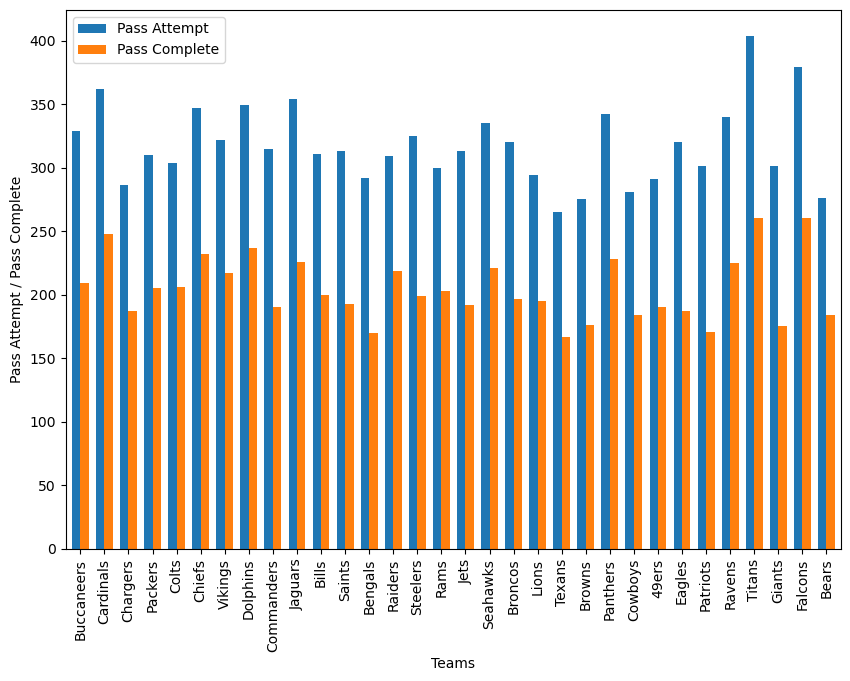

In [40]:
plt.rcParams["figure.figsize"] = (10,7)

pl_df = pd.DataFrame({'Pass Attempt': Attempt, 'Pass Complete':Complete}, index=index)
ax = pl_df.plot(kind="bar", width=0.7)
plt.xlabel('Teams') 
plt.ylabel('Pass Attempt / Pass Complete') 
plt.show()

6. Lets scrape our target website by passing url to our scrape_func
url: https://www.nfl.com/stats/team-stats/defense/rushing/2022/reg/all
Get Team Names, Pass Attempt and Pass Completed stats

In [41]:
scraped = scrape_func('https://www.nfl.com/stats/team-stats/defense/rushing/2022/reg/all')

In [42]:
scraped

,Team,Att,Rush Yds,YPC,TD,Rush 1st,Rush 1st%
0,BearsBears,304,1420,4.7,17,85,28
1,FalconsFalcons,270,1194,4.4,13,74,27.4
2,GiantsGiants,220,1199,5.4,5,57,25.9
3,TitansTitans,213,822,3.9,2,54,25.4
4,EaglesEagles,237,1123,4.7,8,67,28.3
5,BrownsBrowns,246,1180,4.8,15,65,26.4
6,CommandersCommanders,253,1113,4.4,5,49,19.4
7,PackersPackers,325,1494,4.6,10,81,24.9
8,JaguarsJaguars,263,1101,4.2,9,69,26.2
9,RavensRavens,194,828,4.3,9,51,26.3


7. Data type conversion and making ready before plotting

In [43]:
scraped = convert_into_float(scraped, scraped.columns[1:])
Team = scraped['Team'].values.tolist()
Attempt = scraped['Att'].values.tolist()
RushYards = scraped['Rush Yds'].values.tolist()

index = []

for item in Team:
    z=len(item)
    x = int(z/2)
    #print(item[:x])
    index.append(item[:x])

8. Plotting

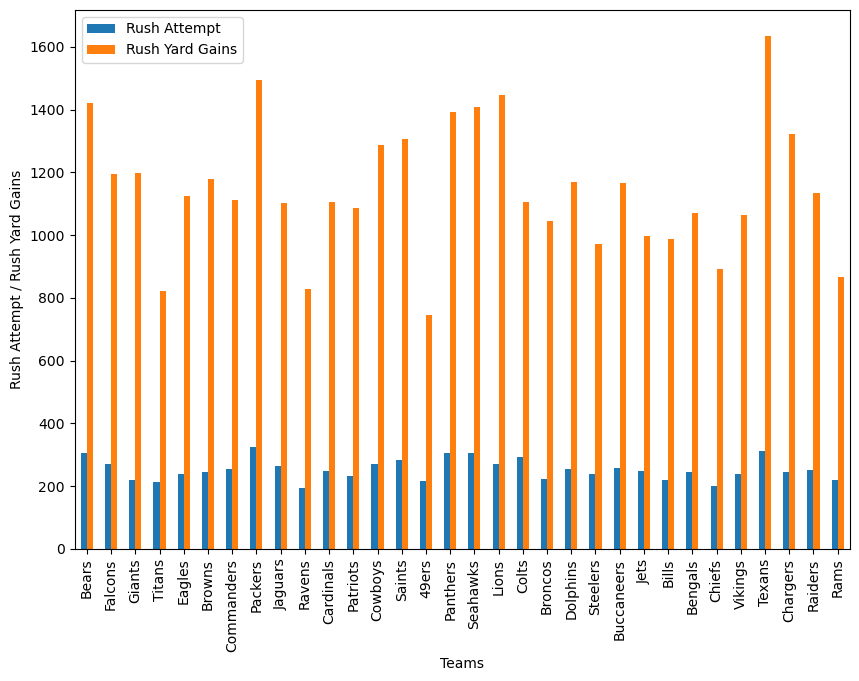

In [44]:
plt.rcParams["figure.figsize"] = (10,7)

pl_df = pd.DataFrame({'Rush Attempt': Attempt, 'Rush Yard Gains':RushYards}, index=index)
ax = pl_df.plot(kind="bar", width=0.5)

plt.xlabel('Teams') 
plt.ylabel('Rush Attempt / Rush Yard Gains') 
plt.show()